# Part I: Geographical Data

In this part, we lay the basis for Geographical Data Science. 

Chapter 1 illustrates how the common types of geographic data can be represented in Python, while Chapter 2 discusses how to represent and store geographical relationships in an efficient data structure. 

# Chapter 1. Geographical Data

<span style="font-size:12pt;">This chapter looks at the three main types of geographical data structures: geographic tables (points, lines, polygons), networks, and surfaces. Examples are adapted from https://geographicdata.science/book/intro.html. </span>

## 1. Geographic Tables 

<span style="font-size:12pt;">In many cases, geographic features can be conceptualized as individual geographic objects, e.g., in the entity types of points, lines, areas (polygons). Geographic objects are usually matched to what we called the geographic table. Geographic tables can be thought of as a tab in a spreadsheet where one of the columns records geometric information. This data structure represents a single geographic object (e.g., a city, a country) as a row of a table; each column in the table records information about the object, its attributes or features, as we will see below. Geographic tables are a typical example of vector data. </span>

<span style="font-size:12pt;">In Python, the GeoDataFrame structure in the package [GeoPandas](https://geopandas.org/index.html) is commonly used to represent geographic tables. GeoPandas allows to import many types of vector data as geographic tables in Python, such as shapefile, GeoJSON, Geography Markup Language (GML), and OCG GeoPackage (.GPKG), and also data in spatial databases (e.g., PostGIS). If you are not familiar with GeoPandas, please refer to https://geopandas.org/getting_started/introduction.html.</span>

In [1]:
import geopandas

<span style="font-size:12pt;">Let's read the countries_clean.gpkg, which contains a list of countries in the world. </span>

In [2]:
gdf = geopandas.read_file('../data/countries/countries_clean.gpkg')
# If you see a "RuntimeWarning", simply ignore it. 

<span style="font-size:12pt;">Let's have a close look at what this table contains. After running the following code, you can see that this geographic tables contains two columns/attribtues: "ADMIN" and "geometry". Each row represents each country, and "geometry" stores the geometry of each country.</span>

In [3]:
gdf

,ADMIN,geometry
0,Indonesia,"MULTIPOLYGON (((13102705.696 463877.598, 13102..."
1,Malaysia,"MULTIPOLYGON (((13102705.696 463877.598, 13101..."
2,Chile,"MULTIPOLYGON (((-7737827.685 -1979875.500, -77..."
3,Bolivia,"POLYGON ((-7737827.685 -1979875.500, -7737828...."
4,Peru,"MULTIPOLYGON (((-7737827.685 -1979875.500, -77..."
...,...,...
155,Taiwan,"MULTIPOLYGON (((13570488.501 2869616.777, 1356..."
156,Japan,"MULTIPOLYGON (((14447401.267 3737037.331, 1444..."
157,Iceland,"MULTIPOLYGON (((-1621215.732 9982883.495, -162..."
158,Solomon Islands,"MULTIPOLYGON (((17867187.118 -1315679.987, 178..."


<span style="font-size:12pt;">The following tells you the geometry type of each row (i.e., each country).</span>


In [4]:
gdf.geom_type

0      MultiPolygon
1      MultiPolygon
2      MultiPolygon
3           Polygon
4      MultiPolygon
           ...     
155    MultiPolygon
156    MultiPolygon
157    MultiPolygon
158    MultiPolygon
159    MultiPolygon
Length: 160, dtype: object

<span style="font-size:12pt;">Let's try to visualize the dataset.</span>

<AxesSubplot:>

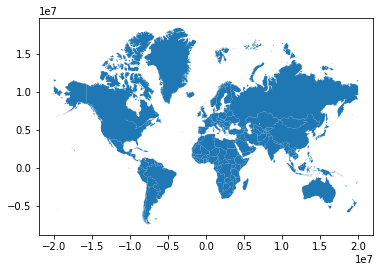

In [5]:
gdf.plot()

<span style="font-size:12pt;">In the following, let's compute the area and centroid of each country, and add them to the table. Note that 'centroid' is also a geometry. Multiple geometry columns are allowed in a GeoDataFrame, however, only one of them is set as the active geometry. In this example, the column 'geometry', instead of 'centroid' is the active geomtetry. </span>

In [6]:
gdf['area'] = gdf.geometry.area
gdf['centroid'] = gdf.geometry.centroid

gdf

,ADMIN,geometry,area,centroid
0,Indonesia,"MULTIPOLYGON (((13102705.696 463877.598, 13102...",1.901567e+12,POINT (13055431.810 -248921.141)
1,Malaysia,"MULTIPOLYGON (((13102705.696 463877.598, 13101...",3.317439e+11,POINT (12211696.493 422897.505)
2,Chile,"MULTIPOLYGON (((-7737827.685 -1979875.500, -77...",1.255936e+12,POINT (-7959811.948 -4915458.802)
3,Bolivia,"POLYGON ((-7737827.685 -1979875.500, -7737828....",1.194826e+12,POINT (-7200010.945 -1894653.148)
4,Peru,"MULTIPOLYGON (((-7737827.685 -1979875.500, -77...",1.339975e+12,POINT (-8277554.831 -1032942.536)
...,...,...,...,...
155,Taiwan,"MULTIPOLYGON (((13570488.501 2869616.777, 1356...",4.341398e+10,POINT (13464229.170 2724159.010)
156,Japan,"MULTIPOLYGON (((14447401.267 3737037.331, 1444...",5.996959e+11,POINT (15380916.599 4560286.809)
157,Iceland,"MULTIPOLYGON (((-1621215.732 9982883.495, -162...",5.712275e+11,POINT (-2069885.342 9615335.051)
158,Solomon Islands,"MULTIPOLYGON (((17867187.118 -1315679.987, 178...",2.805848e+10,POINT (17771462.608 -996505.681)


<span style="font-size:12pt;">Let's visualize both boundary and centroid point of each country. Despite the fact that centroid is a geometry, it is not currently set as the geometry for our table. We can switch to the centroid column using the set_geometry() method.</span>

<span style="font-size:12pt;">We can thematically color each feature based on a column by passing the name of that column to the plot method, as we do on with 'ADMIN' (for centroid points) and 'area' (for country boundaries) in this case.</span>

<AxesSubplot:>

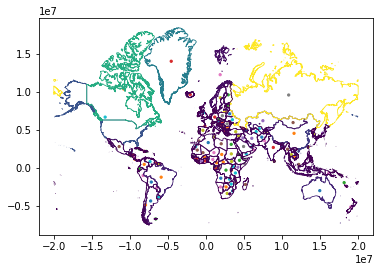

In [7]:
# Plot centroids; Note that set_geometry in the following ONLY temporally sets the active geometry column as 'centroid'.
# Howwever, in other words, after this line of code, the active geometry cloumn is still 'geometry'. 
# If you want to change the active geometry cloumn, use: gdf = gdf.set_geometry('centroid')
ax = gdf.set_geometry('centroid').plot('ADMIN', markersize=5)

# Plot polygons without color filling
gdf.plot('area', 
                 ax=ax, 
                 facecolor='none',
                 #edgecolor='k', 
                 linewidth=.8
                )

<span style="font-size:12pt;">In the following, we select the data about Belgium, and plot the result.</span>

<AxesSubplot:>

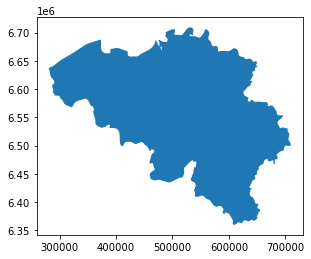

In [8]:
gdf.query('ADMIN == "Belgium"').plot()

<AxesSubplot:>

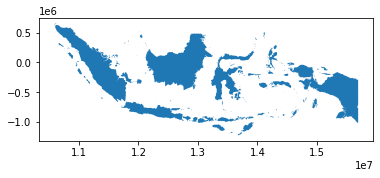

In [9]:
# plot Indonesia, whose bounardy is a MultiPolygon
gdf.query('ADMIN == "Indonesia"').plot()

<span style="font-size:12pt;">We can also remove columns.</span>

In [10]:
gdf = gdf.drop(columns=['centroid'])
gdf

,ADMIN,geometry,area
0,Indonesia,"MULTIPOLYGON (((13102705.696 463877.598, 13102...",1.901567e+12
1,Malaysia,"MULTIPOLYGON (((13102705.696 463877.598, 13101...",3.317439e+11
2,Chile,"MULTIPOLYGON (((-7737827.685 -1979875.500, -77...",1.255936e+12
3,Bolivia,"POLYGON ((-7737827.685 -1979875.500, -7737828....",1.194826e+12
4,Peru,"MULTIPOLYGON (((-7737827.685 -1979875.500, -77...",1.339975e+12
...,...,...,...
155,Taiwan,"MULTIPOLYGON (((13570488.501 2869616.777, 1356...",4.341398e+10
156,Japan,"MULTIPOLYGON (((14447401.267 3737037.331, 1444...",5.996959e+11
157,Iceland,"MULTIPOLYGON (((-1621215.732 9982883.495, -162...",5.712275e+11
158,Solomon Islands,"MULTIPOLYGON (((17867187.118 -1315679.987, 178...",2.805848e+10


<span style="font-size:12pt;">What is the Coordinate Reference System (CRS) of this dataset? In which measurement unit?</span>

In [11]:
gdf.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<span style="font-size:12pt;">Transform its CRS to WGS 84 ("EPSG:4326"). See the coordinate differences? Now the coordinates are lat/long in degrees.</span>

In [12]:
gdf_wgs84 = gdf.to_crs("EPSG:4326")
gdf_wgs84

,ADMIN,geometry,area
0,Indonesia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...",1.901567e+12
1,Malaysia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...",3.317439e+11
2,Chile,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...",1.255936e+12
3,Bolivia,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...",1.194826e+12
4,Peru,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...",1.339975e+12
...,...,...,...
155,Taiwan,"MULTIPOLYGON (((121.90577 24.95010, 121.83473 ...",4.341398e+10
156,Japan,"MULTIPOLYGON (((129.78321 31.79963, 129.79086 ...",5.996959e+11
157,Iceland,"MULTIPOLYGON (((-14.56363 66.38451, -14.61075 ...",5.712275e+11
158,Solomon Islands,"MULTIPOLYGON (((160.50367 -11.73602, 160.56446...",2.805848e+10


<span style="font-size:12pt;">Writing a GeoDataFrame back to file is similarly simple, using GeoDataFrame.to_file. The default file format is Shapefile, but you can specify your own using driver keyword.</span>

In [13]:
gdf_wgs84.to_file("../data/countries/countries.geojson", driver='GeoJSON')

/Users/hhuang/opt/anaconda3/envs/hellp/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


<span style="font-size:12pt;">For more examples regarding GeoPandas, plesee refer to https://geopandas.org/getting_started/introduction.html.</span>

## 2. Spatial Networks

<span style="font-size:12pt;">From "Introduction to GIS", we know that a (spatial) network consisits of a series of interconnecting lines along which there is a flow of data, objects or materials. Some examples are: road network, utility network, rivers, rail network, … </span>

<span style="font-size:12pt;">In essential, a network (aka graph) is composed of nodes that are linked together by edges. In a spatial network, nodes may represent geographical places, and thus have a specific location; likewise, edges may represent geographical paths between these places. Networks require both nodes and edges to analyze their structure.</span>

<span style="font-size:12pt;">In Python, we can use the [osmnx](https://github.com/gboeing/osmnx) package. For User reference, see https://osmnx.readthedocs.io/en/stable/index.html</span>

In [14]:
# It is customary, even thought not required, to place all import statements at the beginning.
# To make it easier for you to see which package is in use, we place the import statement here.
import osmnx

In [15]:
%%time
graph = osmnx.graph_from_place("Sterre, Ghent, Belgium")
type(graph)

# See https://osmnx.readthedocs.io/en/stable/osmnx.html#module-osmnx.graph for more data access options.

/Users/hhuang/opt/anaconda3/envs/hellp/lib/python3.9/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


CPU times: user 1.71 s, sys: 237 ms, total: 1.95 s
Wall time: 11.8 s


networkx.classes.multidigraph.MultiDiGraph

<span style="font-size:12pt;">The code snippet above sends the query to the OpenStreetMap server, which returns back the data to osmnx to process it into the graph Python representation.</span>

<span style="font-size:12pt;">We can have a quick inspection of the structure of the graph with the plot_graph method:</span>

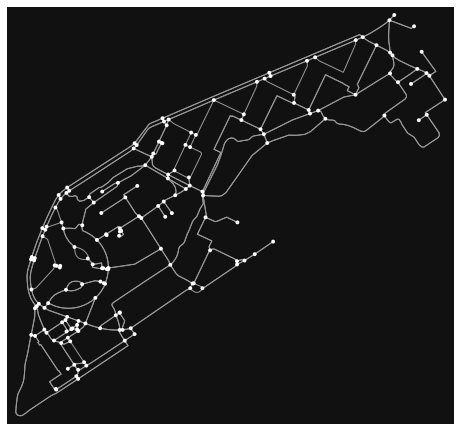

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [16]:
osmnx.plot_graph(graph)

<span style="font-size:12pt;">The resultant graph object is actually a MultiDiGraph from networkx, a graph library written in Python. The graph here is stored as a collection of nodes (street intersections), and edges (streets) that connect them: </span>

In [17]:
len(graph.nodes), len(graph.edges)

(176, 466)

In [18]:
graph.nodes
#graph.edges

NodeView((263516782, 263516785, 263516792, 263516801, 263516803, 263516805, 263516810, 263516818, 263516824, 263516851, 263516855, 263516878, 263516881, 263516891, 263516895, 263516915, 263516916, 263516918, 263516922, 263516923, 263516929, 263516934, 263516936, 263516940, 263516942, 263516944, 263516949, 263516950, 263516953, 263516955, 263516958, 263516970, 616779818, 616779823, 616779830, 616779844, 644064223, 644064265, 644064279, 644064299, 644064336, 644064401, 644064901, 644064921, 644084560, 644084561, 644084588, 644084591, 644084594, 1192759016, 2298063503, 2343194778, 2343194789, 2516170315, 2516170317, 2516170323, 2516170329, 2516170331, 2516170334, 2516170335, 2712677638, 3588426935, 3756556378, 3783165401, 3783532643, 3783532644, 3783532650, 3783532652, 3783532656, 3783540900, 3783541658, 3783541662, 3783573275, 3783573285, 3783573953, 3783574524, 3783574527, 3783574528, 3783574529, 3783574539, 3783574546, 3783574557, 3783574566, 3783574579, 3783574587, 3783574589, 3783574

In [19]:
graph.nodes[263516782]

{'y': 51.0279504, 'x': 3.7183081, 'street_count': 3}

In [20]:
#The characteristics of an edge:
graph.edges[(263516782, 263516785, 0)]

{'osmid': 445523836,
 'highway': 'service',
 'maxspeed': '30',
 'access': 'permissive',
 'oneway': False,
 'length': 11.642}

In [21]:
#Or how the different components of the graph relate to each other. 
#For example, what other nodes are directly connected to node 1520546819?
list(graph.adj[616779830].keys())

[3783532652, 616779844]

<span style="font-size:12pt;">Thus, networks are easy to represent in Python, and are one of the three main data structures in geographical data science. </span>

## 3. Surfaces

<span style="font-size:12pt;">Surfaces are used to record data from a field data model. In theory, a field is a continuous surface and thus has an infinite number of locations at which it could be measured. In reality however, fields are measured at a finite sample of locations that, to provide a sense of continuity and better conform with the field model, are uniformly structured across space. Surfaces thus, are represented as grids where each cell contains a sample. A grid can also be thought of as a table with rows and columns but, both of them are directly tied to geographic location. This is in sharp contrast with geographic tables, where geography is confined to a single column.</span>

<span style="font-size:12pt;">To explore how Python represents surfaces, we will use an extract for the Brazillian city of Sao Paulo of [a global population dataset](https://geographicdata.science/book/data/ghsl/build_ghsl_extract.html). This dataset records population counts in cells of the same dimensions uniformly covering the surface of the Earth. Our extract is available as a GeoTIF file, a variation of the TIF image format that includes geographic information. We can use the open_rasterio() method from the [xarray package](https://xarray-contrib.github.io/xarray-tutorial/) to read in the GeoTIF:</span>

In [22]:
#conda install -c conda-forge xarray

In [23]:
import xarray

In [24]:
pop = xarray.open_rasterio("../data/ghsl/ghsl_sao_paulo.tiff")
type(pop)

/var/folders/kd/tx2czhr54j5_43wpntwvtzf40000gn/T/ipykernel_9968/478756827.py:1: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  pop = xarray.open_rasterio("../data/ghsl/ghsl_sao_paulo.tiff")


xarray.core.dataarray.DataArray

<span style="font-size:12pt;">`xarray` is a package to work with multi-dimensional labelled arrays. Let's unpack this: we can use arrays of not only two dimensions as in a table with rows and columns, but with an arbitrary number of them; each of these dimensions are "tracked" by an index that makes it easy and efficient to manipulate. In `xarray`, these indices are called coordinates, and they can be retrieved from our `DataArray` through the `coords` attribute:</span>

In [25]:
pop.coords

Coordinates:
  * band     (band) int64 1
  * y        (y) float64 -2.822e+06 -2.822e+06 ... -2.926e+06 -2.926e+06
  * x        (x) float64 -4.482e+06 -4.482e+06 ... -4.365e+06 -4.365e+06

<span style="font-size:12pt;">Our surface has *three* dimensions: `x`, `y`, and `band`. The former two to track the latitude and longitude that each cell in our population grid covers. The third one has a single value (1) and, in this context, it is not very useful. But it is easy to imagine contexts where a third dimension would be useful. For example, an optical color image may have three bands: red, blue, and green. More powerful sensors may pick up additional bands, such as near infrared (NIR) or even radio bands. Or, a surface measured over time, will have bands for each point in time at which the field is measured. A geographic surface will thus have two dimensions recording the location of cells (`x` and `y`), and at least one `band` that records other dimensions pertaining to our data. </span>

<span style="font-size:12pt;">An `xarray.DataArray` object contains additional information about the values stored under the `attrs` attribute: </span>

In [26]:
pop.attrs

{'transform': (250.0, 0.0, -4482000.0, 0.0, -250.0, -2822000.0),
 'crs': '+proj=moll +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs=True',
 'res': (250.0, 250.0),
 'is_tiled': 0,
 'nodatavals': (-200.0,),
 'scales': (1.0,),
 'offsets': (0.0,),
 'AREA_OR_POINT': 'Area',
 'grid_mapping': 'spatial_ref'}

<span style="font-size:12pt;">In this case, we can see this includes information required to convert pixels in the array into locations on the Earth surface (e.g. `transform`, and `crs`), the resolution (250 metres by 250 metres), and other metadata that allows us to better understand where the data comes from and how it is stored.</span>

<span style="font-size:12pt;">Thus, our `DataArray` has three dimensions: </span>

In [27]:
pop.shape

(1, 416, 468)

<span style="font-size:12pt;">A common operation will be to reduce this to only the two geographic ones. We can do this with the `sel` operator, which allows us to select data by the value of their coordinates:</span>

In [28]:
pop.sel(band=1)

<xarray.DataArray (y: 416, x: 468)>
[194688 values with dtype=float32]
Coordinates:
    band     int64 1
  * y        (y) float64 -2.822e+06 -2.822e+06 ... -2.926e+06 -2.926e+06
  * x        (x) float64 -4.482e+06 -4.482e+06 ... -4.365e+06 -4.365e+06
Attributes:
    transform:      (250.0, 0.0, -4482000.0, 0.0, -250.0, -2822000.0)
    crs:            +proj=moll +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +...
    res:            (250.0, 250.0)
    is_tiled:       0
    nodatavals:     (-200.0,)
    scales:         (1.0,)
    offsets:        (0.0,)
    AREA_OR_POINT:  Area
    grid_mapping:   spatial_ref

<span style="font-size:12pt;">The resulting object is thus a two-dimensional array. Similar to geographic tables, we can quickly plot the values in our dataset:</span>

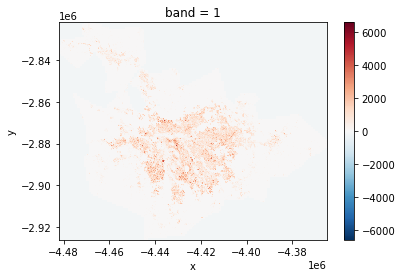

In [29]:
pop.sel(band=1).plot()

<span style="font-size:12pt;">This gives us an overview of the distribution of population in the Sao Paulo region. However, if we inspect further, we can see that the map includes negative counts! How could this be? As it turns out, missing data are traditionally stored in surfaces not as a class of its own (e.g. `NaN`) but with an impossible value. If we return to the `attrs` printout above, we can see how the `nodatavals` attribute specifies missing data recorded with -200. With that in mind, we can use the `where()` method to select only values that are *not* -200:</span>

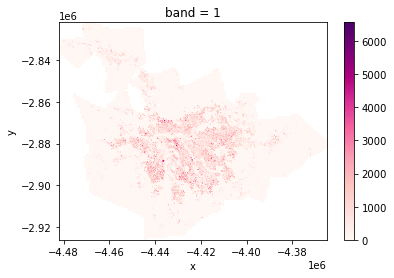

In [30]:
pop.where(pop!=-200)\
   .sel(band=1)\
   .plot(cmap="RdPu")

#for more regarding the cmap color list, see https://matplotlib.org/stable/tutorials/colors/colormaps.html

<span style="font-size:12pt;">The colorbar now looks more sensible, and indicates *real* counts, rather than including the missing data placeholder values.</span>

## 4. Conclusions 

<span style="font-size:12pt;">We have just seen how geographic tables, surfaces, and networks map onto `GeoDataFrame`, `DataArray` and `Graph` objects in Python, respectively.</span>

<span style="font-size:12pt;">For more advanced topics, such as hybird representations and transformation, please refer to https://geographicdata.science/book/notebooks/03_spatial_data.html#hybrids.</span>